In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import set_all_seeds, train, evaluate, plot_MSE_scores

from exploitation.models import GAT, MPGCN_Net, GCN


%load_ext autoreload
%autoreload 2

NUM_EXPERIMENTS = 5
set_all_seeds(seed=4)

## Original Graphs Without Weights

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### Message-passing GCN Without Weights

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Message-passing GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = MPGCN_Net(
        in_channels=n_features,
        hidden_channels=64,
        out_channels=1,
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.001)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.1770
MSE: 0.1870
Epoch 00002 | Loss: 0.1718
Epoch 00003 | Loss: 0.1679
Epoch 00004 | Loss: 0.1645
Epoch 00005 | Loss: 0.1624
Epoch 00006 | Loss: 0.1629
MSE: 0.1824
Epoch 00007 | Loss: 0.1630
Epoch 00008 | Loss: 0.1628
Epoch 00009 | Loss: 0.1625
Epoch 00010 | Loss: 0.1622
Epoch 00011 | Loss: 0.1619
MSE: 0.1807
Epoch 00012 | Loss: 0.1616
Epoch 00013 | Loss: 0.1613
Epoch 00014 | Loss: 0.1610
Epoch 00015 | Loss: 0.1607
Epoch 00016 | Loss: 0.1605
MSE: 0.1792
Epoch 00017 | Loss: 0.1602
Epoch 00018 | Loss: 0.1598
Epoch 00019 | Loss: 0.1595
Epoch 00020 | Loss: 0.1592
Epoch 00021 | Loss: 0.1589
MSE: 0.1776
Epoch 00022 | Loss: 0.1585
Epoch 00023 | Loss: 0.1582
Epoch 00024 | Loss: 0.1578
Epoch 00025 | Loss: 0.1574
Epoch 00026 | Loss: 0.1570
MSE: 0.1757
Epoch 00027 | Loss: 0.1566
Epoch 00028 | Loss: 0.1562
Epoch 00029 | Loss: 0.1558
Epoch 00030 | Loss: 0.1554
Epoch 00031 | Loss: 0.1549
MSE: 0.1735
Epoch 00032 | Loss: 0.1544
Epoch 00033 | Loss: 0.1540
Epoch 00034

MSE of Message-passing GCN without weights-0 on the test set: 0.0183
MSE of Message-passing GCN without weights-1 on the test set: 0.0267
MSE of Message-passing GCN without weights-2 on the test set: 0.0274
MSE of Message-passing GCN without weights-3 on the test set: 0.0254
MSE of Message-passing GCN without weights-4 on the test set: 0.0130
OVERALL: MSE of Message-passing GCN without weights on the test set: 0.0254


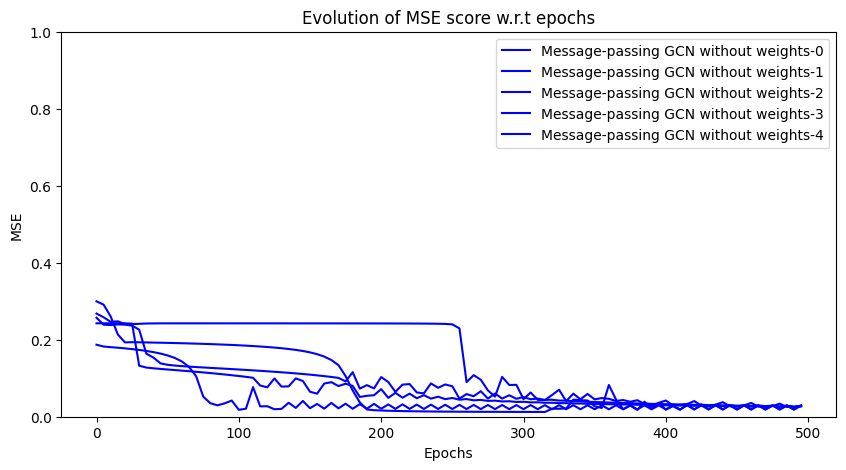

In [4]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### GAT Without Weights

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=1,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2417
MSE: 0.2426
Epoch 00002 | Loss: 0.2418
Epoch 00003 | Loss: 0.2418
Epoch 00004 | Loss: 0.2417
Epoch 00005 | Loss: 0.2418
Epoch 00006 | Loss: 0.2418
MSE: 0.2426
Epoch 00007 | Loss: 0.2418
Epoch 00008 | Loss: 0.2418
Epoch 00009 | Loss: 0.2418
Epoch 00010 | Loss: 0.2418
Epoch 00011 | Loss: 0.2415
MSE: 0.2426
Epoch 00012 | Loss: 0.2416
Epoch 00013 | Loss: 0.2417
Epoch 00014 | Loss: 0.2418
Epoch 00015 | Loss: 0.2418
Epoch 00016 | Loss: 0.2418
MSE: 0.2426
Epoch 00017 | Loss: 0.2418
Epoch 00018 | Loss: 0.2414
Epoch 00019 | Loss: 0.2418
Epoch 00020 | Loss: 0.2418
Epoch 00021 | Loss: 0.2418
MSE: 0.2426
Epoch 00022 | Loss: 0.2418
Epoch 00023 | Loss: 0.2418
Epoch 00024 | Loss: 0.2417
Epoch 00025 | Loss: 0.2418
Epoch 00026 | Loss: 0.2415
MSE: 0.2426
Epoch 00027 | Loss: 0.2417
Epoch 00028 | Loss: 0.2417
Epoch 00029 | Loss: 0.2412
Epoch 00030 | Loss: 0.2418
Epoch 00031 | Loss: 0.2416
MSE: 0.2426
Epoch 00032 | Loss: 0.2417
Epoch 00033 | Loss: 0.2418
Epoch 00034

MSE of GAT without weights-0 on the test set: 0.2278
MSE of GAT without weights-1 on the test set: 0.3630
MSE of GAT without weights-2 on the test set: 0.2278
MSE of GAT without weights-3 on the test set: 0.2278
MSE of GAT without weights-4 on the test set: 0.2267
OVERALL: MSE of GAT without weights on the test set: 0.2278


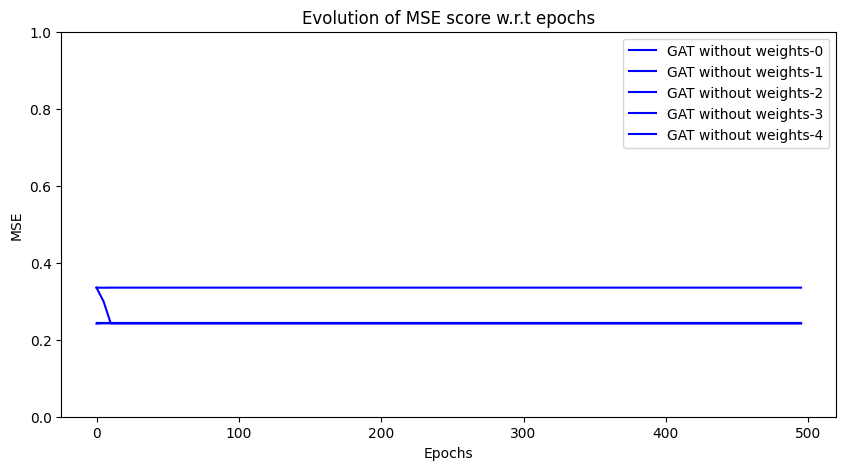

In [6]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### GCN Without Weights

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3339
MSE: 0.3327
Epoch 00002 | Loss: 0.3330
Epoch 00003 | Loss: 0.3316
Epoch 00004 | Loss: 0.3300
Epoch 00005 | Loss: 0.3284
Epoch 00006 | Loss: 0.3256
MSE: 0.3308
Epoch 00007 | Loss: 0.3228
Epoch 00008 | Loss: 0.3200
Epoch 00009 | Loss: 0.3180
Epoch 00010 | Loss: 0.3169
Epoch 00011 | Loss: 0.3161
MSE: 0.3202
Epoch 00012 | Loss: 0.3124
Epoch 00013 | Loss: 0.3025
Epoch 00014 | Loss: 0.2882
Epoch 00015 | Loss: 0.2679
Epoch 00016 | Loss: 0.2580
MSE: 0.2646
Epoch 00017 | Loss: 0.2371
Epoch 00018 | Loss: 0.2220
Epoch 00019 | Loss: 0.2040
Epoch 00020 | Loss: 0.2019
Epoch 00021 | Loss: 0.2002
MSE: 0.2112
Epoch 00022 | Loss: 0.2004
Epoch 00023 | Loss: 0.2006
Epoch 00024 | Loss: 0.2002
Epoch 00025 | Loss: 0.1997
Epoch 00026 | Loss: 0.1997
MSE: 0.2091
Epoch 00027 | Loss: 0.1998
Epoch 00028 | Loss: 0.1996
Epoch 00029 | Loss: 0.1995
Epoch 00030 | Loss: 0.1994
Epoch 00031 | Loss: 0.1993
MSE: 0.2083
Epoch 00032 | Loss: 0.1992
Epoch 00033 | Loss: 0.1991
Epoch 00034

MSE of GCN without weights-0 on the test set: 0.0806
MSE of GCN without weights-1 on the test set: 0.0326
MSE of GCN without weights-2 on the test set: 0.0313
MSE of GCN without weights-3 on the test set: 0.3607
MSE of GCN without weights-4 on the test set: 0.3607
OVERALL: MSE of GCN without weights on the test set: 0.0806


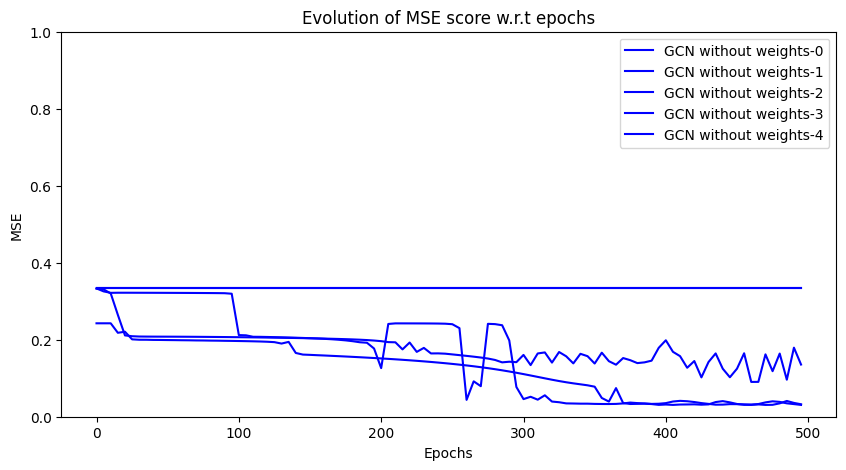

In [8]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Sparsified Graphs Without Weights

In [9]:
batch_size = 1
threshold = 15

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive", sparsify_threshold=threshold)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive", sparsify_threshold=threshold)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive", sparsify_threshold=threshold)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 3355], y=[359], x=[359, 8], edge_attr=[3355, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 354, 355, 356],
        [ 89, 183,   0,  ..., 354, 355, 356]])
Number of features per node:  8


### Sparsified Message-passing GCN Without Weights

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified message-passing GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = MPGCN_Net(
        in_channels=n_features,
        hidden_channels=64,
        out_channels=1
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.001)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3431
MSE: 0.3353
Epoch 00002 | Loss: 0.3431
Epoch 00003 | Loss: 0.3431
Epoch 00004 | Loss: 0.3431
Epoch 00005 | Loss: 0.3431
Epoch 00006 | Loss: 0.3431
MSE: 0.3353
Epoch 00007 | Loss: 0.3431
Epoch 00008 | Loss: 0.3431
Epoch 00009 | Loss: 0.3431
Epoch 00010 | Loss: 0.3431
Epoch 00011 | Loss: 0.3431
MSE: 0.3353
Epoch 00012 | Loss: 0.3431
Epoch 00013 | Loss: 0.3431
Epoch 00014 | Loss: 0.3431
Epoch 00015 | Loss: 0.3431
Epoch 00016 | Loss: 0.3431
MSE: 0.3353
Epoch 00017 | Loss: 0.3431
Epoch 00018 | Loss: 0.3431
Epoch 00019 | Loss: 0.3431
Epoch 00020 | Loss: 0.3431
Epoch 00021 | Loss: 0.3431
MSE: 0.3353
Epoch 00022 | Loss: 0.3431
Epoch 00023 | Loss: 0.3431
Epoch 00024 | Loss: 0.3431
Epoch 00025 | Loss: 0.3431
Epoch 00026 | Loss: 0.3431
MSE: 0.3353
Epoch 00027 | Loss: 0.3431
Epoch 00028 | Loss: 0.3431
Epoch 00029 | Loss: 0.3431
Epoch 00030 | Loss: 0.3431
Epoch 00031 | Loss: 0.3431
MSE: 0.3353
Epoch 00032 | Loss: 0.3431
Epoch 00033 | Loss: 0.3431
Epoch 00034

MSE of Sparsified message-passing GCN without weights-0 on the test set: 0.3607
MSE of Sparsified message-passing GCN without weights-1 on the test set: 0.0169
MSE of Sparsified message-passing GCN without weights-2 on the test set: 0.0164
MSE of Sparsified message-passing GCN without weights-3 on the test set: 0.0166
MSE of Sparsified message-passing GCN without weights-4 on the test set: 0.0169
OVERALL: MSE of Sparsified message-passing GCN without weights on the test set: 0.0169


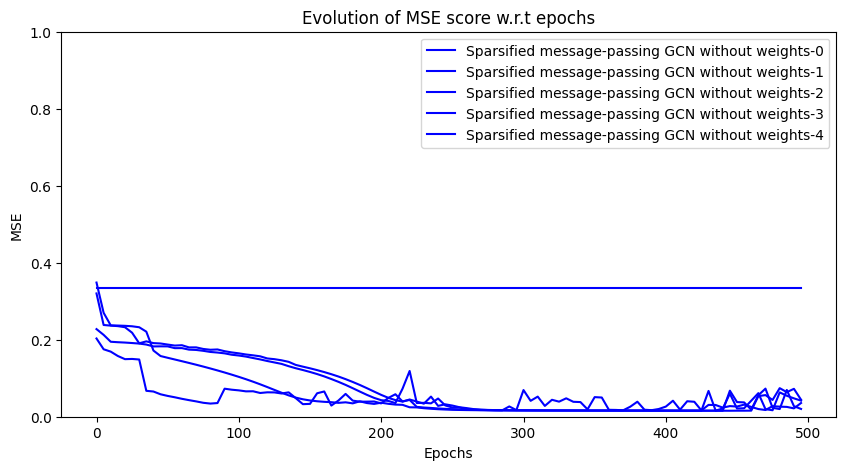

In [11]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### Sparsified GAT Without Weights

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=1,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.1853
MSE: 0.1653
Epoch 00002 | Loss: 0.1852
Epoch 00003 | Loss: 0.1919
Epoch 00004 | Loss: 0.1860
Epoch 00005 | Loss: 0.1803
Epoch 00006 | Loss: 0.1786
MSE: 0.1628
Epoch 00007 | Loss: 0.1781
Epoch 00008 | Loss: 0.1704
Epoch 00009 | Loss: 0.1672
Epoch 00010 | Loss: 0.1693
Epoch 00011 | Loss: 0.1701
MSE: 0.1616
Epoch 00012 | Loss: 0.1621
Epoch 00013 | Loss: 0.1690
Epoch 00014 | Loss: 0.1679
Epoch 00015 | Loss: 0.1649
Epoch 00016 | Loss: 0.1664
MSE: 0.1540
Epoch 00017 | Loss: 0.1589
Epoch 00018 | Loss: 0.1415
Epoch 00019 | Loss: 0.1295
Epoch 00020 | Loss: 0.1221
Epoch 00021 | Loss: 0.1216
MSE: 0.0916
Epoch 00022 | Loss: 0.1183
Epoch 00023 | Loss: 0.1183
Epoch 00024 | Loss: 0.1082
Epoch 00025 | Loss: 0.1171
Epoch 00026 | Loss: 0.1130
MSE: 0.0854
Epoch 00027 | Loss: 0.1109
Epoch 00028 | Loss: 0.1176
Epoch 00029 | Loss: 0.1162
Epoch 00030 | Loss: 0.1114
Epoch 00031 | Loss: 0.1178
MSE: 0.0824
Epoch 00032 | Loss: 0.1096
Epoch 00033 | Loss: 0.1111
Epoch 00034

MSE of Sparsified GAT without weights-0 on the test set: 0.0884
MSE of Sparsified GAT without weights-1 on the test set: 0.0126
MSE of Sparsified GAT without weights-2 on the test set: 0.0192
MSE of Sparsified GAT without weights-3 on the test set: 0.0149
MSE of Sparsified GAT without weights-4 on the test set: 0.0125
OVERALL: MSE of Sparsified GAT without weights on the test set: 0.0149


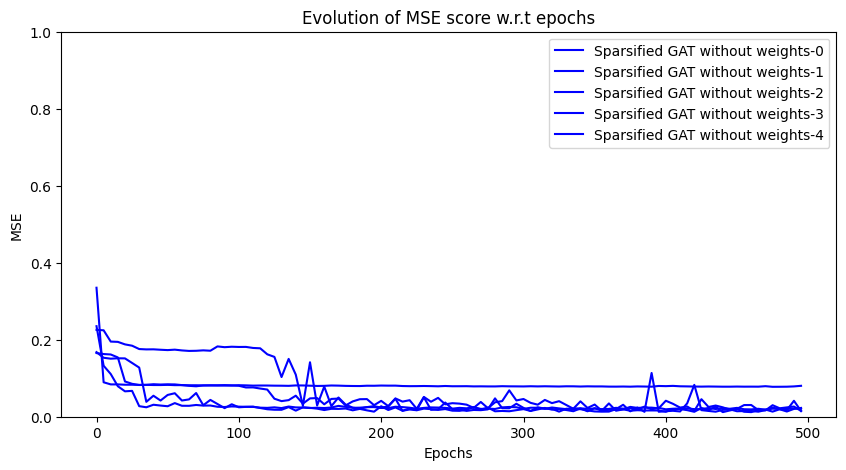

In [13]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### Sparsified GCN Without Weights

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.1699
MSE: 0.1703
Epoch 00002 | Loss: 0.1685
Epoch 00003 | Loss: 0.1672
Epoch 00004 | Loss: 0.1663
Epoch 00005 | Loss: 0.1660
Epoch 00006 | Loss: 0.1656
MSE: 0.1781
Epoch 00007 | Loss: 0.1657
Epoch 00008 | Loss: 0.1657
Epoch 00009 | Loss: 0.1657
Epoch 00010 | Loss: 0.1655
Epoch 00011 | Loss: 0.1654
MSE: 0.1825
Epoch 00012 | Loss: 0.1650
Epoch 00013 | Loss: 0.1649
Epoch 00014 | Loss: 0.1650
Epoch 00015 | Loss: 0.1650
Epoch 00016 | Loss: 0.1649
MSE: 0.1827
Epoch 00017 | Loss: 0.1649
Epoch 00018 | Loss: 0.1649
Epoch 00019 | Loss: 0.1649
Epoch 00020 | Loss: 0.1649
Epoch 00021 | Loss: 0.1649
MSE: 0.1828
Epoch 00022 | Loss: 0.1649
Epoch 00023 | Loss: 0.1648
Epoch 00024 | Loss: 0.1648
Epoch 00025 | Loss: 0.1648
Epoch 00026 | Loss: 0.1648
MSE: 0.1829
Epoch 00027 | Loss: 0.1648
Epoch 00028 | Loss: 0.1648
Epoch 00029 | Loss: 0.1648
Epoch 00030 | Loss: 0.1648
Epoch 00031 | Loss: 0.1647
MSE: 0.1829
Epoch 00032 | Loss: 0.1647
Epoch 00033 | Loss: 0.1647
Epoch 00034

MSE of Sparsified GCN without weights-0 on the test set: 0.0233
MSE of Sparsified GCN without weights-1 on the test set: 0.0245
MSE of Sparsified GCN without weights-2 on the test set: 0.2278
MSE of Sparsified GCN without weights-3 on the test set: 0.1687
MSE of Sparsified GCN without weights-4 on the test set: 0.0195
OVERALL: MSE of Sparsified GCN without weights on the test set: 0.0245


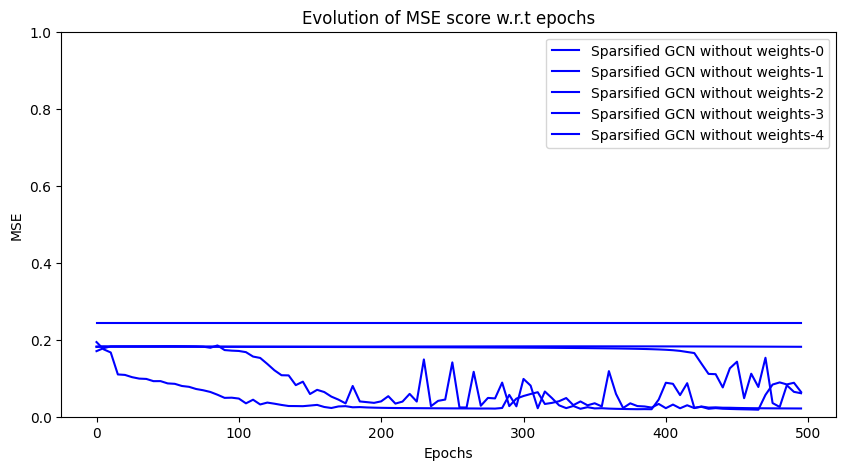

In [15]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Original Graphs With Weights

In [16]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### Message-passing GCN Without Weights

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Message-passing GCN with weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = MPGCN_Net(
        in_channels=n_features,
        hidden_channels=64,
        out_channels=1,
        weighted_graph=True
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.001)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3431
MSE: 0.3353
Epoch 00002 | Loss: 0.3431
Epoch 00003 | Loss: 0.3431
Epoch 00004 | Loss: 0.3431
Epoch 00005 | Loss: 0.3431
Epoch 00006 | Loss: 0.3431
MSE: 0.3353
Epoch 00007 | Loss: 0.3431
Epoch 00008 | Loss: 0.3431
Epoch 00009 | Loss: 0.3431
Epoch 00010 | Loss: 0.3431
Epoch 00011 | Loss: 0.3431
MSE: 0.3353
Epoch 00012 | Loss: 0.3431
Epoch 00013 | Loss: 0.3431
Epoch 00014 | Loss: 0.3431
Epoch 00015 | Loss: 0.3431
Epoch 00016 | Loss: 0.3431
MSE: 0.3353
Epoch 00017 | Loss: 0.3431
Epoch 00018 | Loss: 0.3431
Epoch 00019 | Loss: 0.3430
Epoch 00020 | Loss: 0.3429
Epoch 00021 | Loss: 0.3418
MSE: 0.3315
Epoch 00022 | Loss: 0.3403
Epoch 00023 | Loss: 0.3389
Epoch 00024 | Loss: 0.3356
Epoch 00025 | Loss: 0.3246
Epoch 00026 | Loss: 0.2636
MSE: 0.1688
Epoch 00027 | Loss: 0.1429
Epoch 00028 | Loss: 0.0939
Epoch 00029 | Loss: 0.0989
Epoch 00030 | Loss: 0.0878
Epoch 00031 | Loss: 0.0890
MSE: 0.0979
Epoch 00032 | Loss: 0.0867
Epoch 00033 | Loss: 0.0862
Epoch 00034

MSE of Message-passing GCN with weights-0 on the test set: 0.0105
MSE of Message-passing GCN with weights-1 on the test set: 0.0231
MSE of Message-passing GCN with weights-2 on the test set: 0.0126
MSE of Message-passing GCN with weights-3 on the test set: 0.0217
MSE of Message-passing GCN with weights-4 on the test set: 0.0165
OVERALL: MSE of Message-passing GCN with weights on the test set: 0.0165


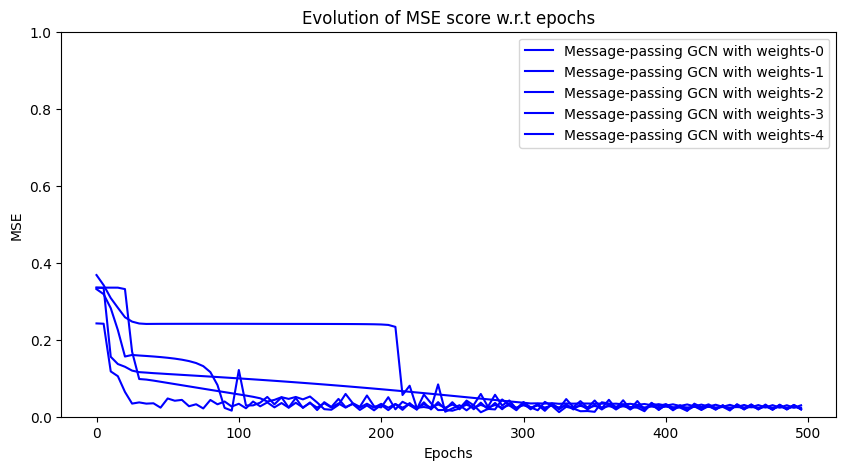

In [18]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)